In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [2]:
dataset = pd.read_csv("/kaggle/input/data123456/used_car_dataset.csv")
dataset.head(5)

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [3]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], 
                                                    dataset.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1473 entries, 1831 to 860
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             1473 non-null   object
 1   car_price_in_rupees  1473 non-null   object
 2   kms_driven           1473 non-null   object
 3   fuel_type            1473 non-null   object
 4   city                 1473 non-null   object
dtypes: object(5)
memory usage: 69.0+ KB


In [5]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [6]:
car_name_counts = dataset['car_name'].value_counts()
print(car_name_counts)

car_name
Maruti Suzuki Wagon R 1.0 VXI        25
Maruti Suzuki Alto 800 Lxi           23
Maruti Suzuki Wagon R 1.0 LXI CNG    21
Maruti Suzuki Baleno Delta 1.2       18
Honda City V                         17
                                     ..
Ford Fiesta Exi 1.6 Duratec Ltd       1
Renault Triber RXZ                    1
BMW 7 Series 730Ld                    1
Nissan Sunny XL D                     1
Maruti Suzuki Ciaz VXi+ AT            1
Name: count, Length: 946, dtype: int64


In [7]:
X = dataset.drop('car_price_in_rupees', axis=1)  # Assuming 'car_price_in_rupees' is the target variable
y = dataset['car_price_in_rupees']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the 'car_name' column
make_train = X_train["car_name"].str.split(" ", expand=True)
make_test = X_test["car_name"].str.split(" ", expand=True)

print(make_train.head())
print(make_test.head())

           0       1         2            3     4     5            6     7   \
874    Maruti  Suzuki  S-Presso          VXi  None  None         None  None   
650    Maruti  Suzuki    Vitara       Brezza   ZDi  Plus          AGS  None   
1596  Hyundai  Santro     Magna  [2018-2020]  None  None         None  None   
1578      Kia   Sonet       HTX         Plus   1.0   iMT  [2020-2021]  None   
1560  Hyundai   Elite       i20         Asta   1.2  None         None  None   

        8     9     10  
874   None  None  None  
650   None  None  None  
1596  None  None  None  
1578  None  None  None  
1560  None  None  None  
               0       1         2      3            4       5     6       7  \
1432      Maruti  Suzuki      Ciaz  Delta          1.3  Hybrid  None    None   
342      Renault  Duster        85     PS          RXS     4X2    MT  Diesel   
984          Kia   Sonet       HTE    1.2  [2020-2021]    None  None    None   
2007     Hyundai   Xcent         S    1.2          (O) 

In [8]:
# Split the 'car_name' column to extract the manufacturer name
make_train = X_train["car_name"].str.split(" ", expand=True)
make_test = X_test["car_name"].str.split(" ", expand=True)

In [9]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]


Text(0, 0.5, 'Count of cars')

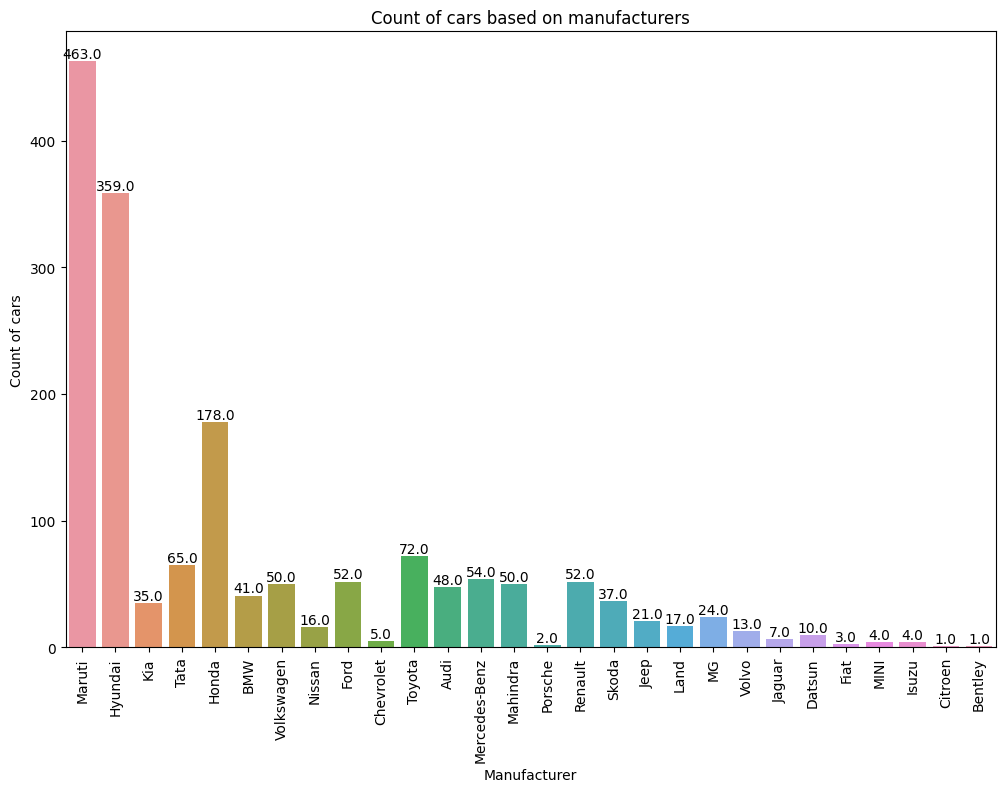

In [10]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [11]:
X_train.drop("car_name", axis = 1, inplace = True)
X_test.drop("car_name", axis = 1, inplace = True)

In [12]:
if 'city' in X_train.columns:
    X_train.drop('city', axis=1, inplace=True)

if 'city' in X_test.columns:
    X_test.drop('city', axis=1, inplace=True)


In [13]:
# Check and drop 'city' column if it exists
if 'city' in X_train.columns:
    X_train.drop('city', axis=1, inplace=True)
if 'city' in X_test.columns:
    X_test.drop('city', axis=1, inplace=True)

# Calculate the age of the cars
curr_time = datetime.datetime.now()
if 'Year' in X_train.columns and 'Year' in X_test.columns:
    X_train['Year'] = X_train['Year'].apply(lambda x: curr_time.year - x)
    X_test['Year'] = X_test['Year'].apply(lambda x: curr_time.year - x)

# Display the first few rows of the modified X_train and X_test
print(X_train.head())
print(X_test.head())

     kms_driven fuel_type  year_of_manufacture Manufacturer
874   31,651 km    Petrol                 2020       Maruti
650   93,500 km    Diesel                 2018       Maruti
1596  24,669 km    Petrol                 2020      Hyundai
1578  18,169 km    Petrol                 2020          Kia
1560  41,068 km    Petrol                 2018      Hyundai
     kms_driven fuel_type  year_of_manufacture Manufacturer
1432  57,498 km    Diesel                 2017       Maruti
342   39,030 km    Diesel                 2018      Renault
984    7,500 km    Petrol                 2021          Kia
2007  44,000 km    Petrol                 2015      Hyundai
1342  40,000 km    Petrol                 2018   Volkswagen


In [14]:
X_train["kms_driven"]


874     31,651 km
650     93,500 km
1596    24,669 km
1578    18,169 km
1560    41,068 km
          ...    
1638    24,858 km
1095    41,624 km
1130     9,578 km
1294    54,982 km
860     33,053 km
Name: kms_driven, Length: 1684, dtype: object

In [15]:
if 'New_Price' in X_train.columns:
    X_train.drop('New_Price', axis=1, inplace=True)
if 'New_Price' in X_test.columns:
    X_test.drop('New_Price', axis=1, inplace=True)

# Display the first few rows of the modified X_train and X_test
print(X_train.head())
print(X_test.head())

     kms_driven fuel_type  year_of_manufacture Manufacturer
874   31,651 km    Petrol                 2020       Maruti
650   93,500 km    Diesel                 2018       Maruti
1596  24,669 km    Petrol                 2020      Hyundai
1578  18,169 km    Petrol                 2020          Kia
1560  41,068 km    Petrol                 2018      Hyundai
     kms_driven fuel_type  year_of_manufacture Manufacturer
1432  57,498 km    Diesel                 2017       Maruti
342   39,030 km    Diesel                 2018      Renault
984    7,500 km    Petrol                 2021          Kia
2007  44,000 km    Petrol                 2015      Hyundai
1342  40,000 km    Petrol                 2018   Volkswagen


In [16]:
# Define the correct categorical columns for one-hot encoding
categorical_columns = ["fuel_type"]  # Add other categorical columns as needed

# Check if the categorical columns exist before encoding
for column in categorical_columns:
    if column not in X_train.columns:
        print(f"Column '{column}' not found in X_train.")
    if column not in X_test.columns:
        print(f"Column '{column}' not found in X_test.")

# Perform one-hot encoding
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Align columns of X_test to X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Display the first few rows of the modified X_train and X_test
print(X_train.head())
print(X_test.head())

     kms_driven  year_of_manufacture Manufacturer  fuel_type_Diesel  \
874   31,651 km                 2020       Maruti             False   
650   93,500 km                 2018       Maruti              True   
1596  24,669 km                 2020      Hyundai             False   
1578  18,169 km                 2020          Kia             False   
1560  41,068 km                 2018      Hyundai             False   

      fuel_type_Diesel + 1  fuel_type_Electric  fuel_type_Hybrid  \
874                  False               False             False   
650                  False               False             False   
1596                 False               False             False   
1578                 False               False             False   
1560                 False               False             False   

      fuel_type_LPG  fuel_type_Petrol  fuel_type_Petrol + 1  
874           False              True                 False  
650           False             False   

In [17]:
def convert_price(price):
    price = price.replace('₹', '').replace(',', '').strip()
    if 'Lakh' in price:
        return float(price.replace('Lakh', '').strip()) * 1e5
    elif 'Crore' in price:
        return float(price.replace('Crore', '').strip()) * 1e7
    else:
        return float(price)

dataset['car_price_in_rupees'] = dataset['car_price_in_rupees'].apply(convert_price)

# Convert kms driven to numeric
dataset['kms_driven'] = dataset['kms_driven'].str.replace(',', '').str.replace(' km', '').astype(float)

# Encode categorical features
le_fuel = LabelEncoder()
le_city = LabelEncoder()
dataset['fuel_type'] = le_fuel.fit_transform(dataset['fuel_type'])
dataset['city'] = le_city.fit_transform(dataset['city'])

# Features and target
X = dataset[['kms_driven', 'fuel_type', 'city', 'year_of_manufacture']]
y = dataset['car_price_in_rupees']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred_lr = linear_regression.predict(X_test)
r2_score_lr = r2_score(y_test, y_pred_lr)

# Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_score_rf = r2_score(y_test, y_pred_rf)

r2_score_lr, r2_score_rf

(0.16265741880046836, 0.09673992978180213)